In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import project_functions
from pandas_profiling import ProfileReport
df = project_functions.load_and_process('/Users/rbowler/school/data301/course-project-solo_127/data/raw/anime.csv')
df

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,Under World,Hentai,OVA,1,4.28,183
12291,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## Amount of people watching based on episode count

Here I wanted to answer my first reaserch question

> Does the number of episodes a show has have the majority of the say in what people watch?

so I began by sorting the episodes by amount to use later in a visualization

In [2]:
# Episodes corresponding to Members data
episodesdf = df.copy()
episodesdf['episodes'] = episodesdf['episodes'].astype(int)
episodesdf = episodesdf.sort_values(by = 'episodes')
episodesdf

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
7169,I Love Sky,"Comedy, Kids",Special,1,5.67,121
7167,Be-Boy Kidnapp&#039;n Idol,"Drama, Shounen Ai",OVA,1,5.67,4311
7165,Anime Tenchou Movie,"Action, Parody",Movie,1,5.67,1280
7164,Violence Jack: Hell&#039;s Wind-hen,"Action, Drama, Horror",OVA,1,5.68,3182
...,...,...,...,...,...,...
6580,Hoka Hoka Kazoku,Comedy,TV,1428,6.05,194
5360,Manga Nippon Mukashibanashi (1976),"Fantasy, Historical",TV,1471,6.48,406
9243,Kirin Monoshiri Yakata,Kids,TV,1565,5.56,116
929,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787,7.76,14233


(0.0, 400.0)

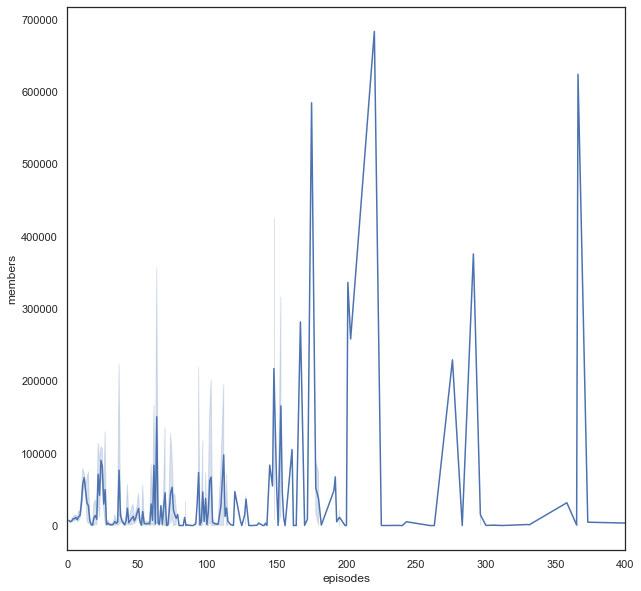

In [3]:
sns.set_theme(style = "white", font_scale = 1)
plt.subplots(figsize = (10,10))
plot = sns.lineplot(x = 'episodes', y = 'members', data = episodesdf)
plt.xlim([0,400])

After creating my visualization I was initially suprised that there was such a strong spike in viewers right around the 175 mark and kept spiking from there for the most part. After looking over it however, I noticed that 0-175 was much more clustered than 175+ and realized that the graph makes perfect sense. Shows with a low episode count are either just starting or cancelled so having a low follower count makes sense while shows with a higher episode count wouldn't have been re-newed for that many episodes if there weren't a high demand aka a large amount of followers. While I'm still confident that the time commitment to get caught up will play a factor in how people choose shows to watch this plot clearly shows that it's not the primary concern

## Genres corresponding to their mean ratings

For my second research question

> Which genre is most popular and which is least popular?

I had a bit of issue as the dataset provided the genres as one big string so I had to first create a method that would allow me to extract and group each individual genre before creating a plot

In [4]:
# Genre corresponding to Rating data
tempdf = df.drop(labels = ['name', 'type', 'episodes', 'members'], axis = 1)
genredf = project_functions.means_of_genres(tempdf)
genredf

,genre,rating
0,Josei,7.443077
1,Thriller,7.382326
2,Mystery,7.233880
3,Police,7.116237
4,Shounen,7.055848
5,Psychological,7.010398
6,Military,7.006193
7,Supernatural,7.004340
8,Romance,6.999554
9,Shoujo Ai,6.978148


Text(0.5, 1.0, 'Anime Genres by Mean Ratings')

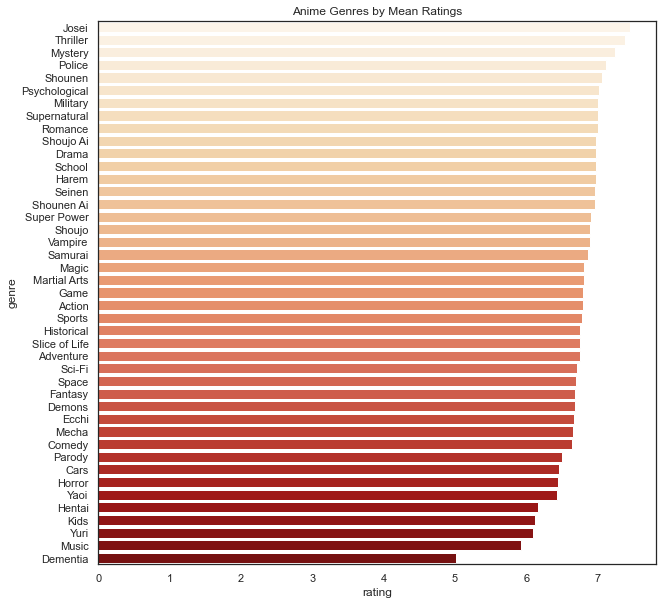

In [6]:
genredf = project_functions.means_of_genres(df)
sns.set_theme(style = "white", font_scale = 1)
plt.subplots(figsize = (10,10))
sns.barplot(x = 'rating', y = 'genre', data = genredf, palette = 'OrRd')
plt.title('Anime Genres by Mean Ratings')

While it was fairly easy to tell just by looking at the altered dataset I made, creating a visualization helped put into perspective how close each of the mean ratings really are to each other.
I was a bit suprised by my findings in that I didn't know what either the *Dementia* or *Josei* genre were and ended up needing to do a bit of research to find out. After some investigation I had little intrest in the [Dementia](https://www.quora.com/What-genre-is-the-anime-Dementia-What-are-some-other-anime-in-that-genre) genre as it is just a more specialized version of *Psychological* that most people apparently don't care much for, but was absolutly blown away that [Josei](https://en.wikipedia.org/wiki/Josei_manga) took the top spot in ratings as it is the genre of romance shows aimed at older/more mature women. This rating suprised me because the only way this rating would make sense to me is becasue it is so niche that only the people who enjoy said niche will watch and rate the shows with that tag. The problem with this theory however is that if high ratings are based on nicheness then why is *Dementia*, possibly the most specialized on this list, at the very bottom. Perhaps I'm just missing out on a hidden goldmine that is *Josei*